# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3 - Дерево решений


**Общая информация**

**Срок сдачи:** до 27 ноября 2017, 23:59   
**Штраф за опоздание:** -2 балла после 23:59  4 декабря, -4 балла после 23:59 11 декабря, -6 баллов после 23:59 18 декабря

При отправлении ДЗ указывайте фамилию в названии файла   


Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush
Необходимо в slack создать таск в приватный чат:   
/todo Фамилия Имя *ссылка на гитхаб* @alkhamush   
Пример:   
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush   

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Разбаловка:**   
За задание можно получить 10 баллов. Для этого нужно следующее:
1. Там, где написано "Ваш код", нужно реализовать метод или часть метода
2. Там, где написано "Что делает этот блок кода?", нужно разобраться в блоке кода и в комментарии написать, что он делает    
3. Добиться, чтобы в пункте "Проверка скорости работы" Ваша реализация работала чуть быстрее, чем у дерева из sklearn
4. Добиться, чтобы в пункте "Проверка качества работы" Ваша реализация работала качественнее, чем у дерева из sklearn

In [1]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import optimize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [ ]:
class MyDecisionTreeClassifier(MyDecisionTreeClassifier_original):
    def __init__(self, **kwargs):
        self.min_samples_leaf = kwargs.pop('min_samples_leaf', 1)
        super(MyDecisionTreeClassifier, self).__init__(**kwargs)
        
    def _find_threshold(self, x, y):
        sorted_x, sorted_y = self._sort_samples(x, y)
        class_number = np.unique(y).shape[0]
        
        splitted_sorted_x = sorted_x[self.min_samples_leaf - 1:len(sorted_y) - self.min_samples_leaf + 1]
        r_border_ids = np.where(splitted_sorted_x[:-1] != splitted_sorted_x[1:])[0] + self.min_samples_leaf
        
        if (len(r_border_ids) == 0) or (class_number == 1):
            return None, float('+inf')
        
        one_hot_code = np.zeros((sorted_y.shape[0], class_number))
        one_hot_code[np.arange(sorted_y.shape[0]), sorted_y] = 1
        
        l_class_count = np.cumsum(one_hot_code, axis=0)[r_border_ids - 1]        
        r_class_count = np.bincount(sorted_y, minlength=class_number) - l_class_count
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        idx = np.argmin(gs)
        
        left_el_id = l_sizes[idx][0]
        gs[idx], sorted_x[left_el_id]
        return gs[idx], 1.0 * sorted_x[left_el_id - 1] * left_el_id / sorted_y.shape[0] + \
    1.0 * sorted_x[left_el_id] * (1.0 - 1.0 * left_el_id / sorted_y.shape[0])


In [34]:
splitted_sorted_y = np.array([1,1,2,1])
np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0]

array([1, 2], dtype=int64)

In [51]:
np.arange(10).reshape((2, 5)) * np.arange(2).reshape((2,1))

array([[0, 0, 0, 0, 0],
       [5, 6, 7, 8, 9]])

In [84]:
x.shape

(120269L, 10L)

In [96]:
x[:2]

array([[  7.66126609e-01,   4.50000000e+01,   2.00000000e+00,
          8.02982129e-01,   9.12000000e+03,   1.30000000e+01,
          0.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          2.00000000e+00],
       [  9.57151019e-01,   4.00000000e+01,   0.00000000e+00,
          1.21876201e-01,   2.60000000e+03,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [115]:
a = np.array([[2,3], [4,1]])

In [116]:
a[a.argsort()]

array([[[2, 3],
        [4, 1]],

       [[4, 1],
        [2, 3]]])

In [156]:
np.array([1,2,3]).reshape(-1,1)[2]

array([3])

In [109]:
x.argsort()[0]

array([6, 8, 0, 3, 2, 9, 7, 5, 1, 4], dtype=int64)

In [114]:
x[0][x[0].argsort()]

array([  0.00000000e+00,   0.00000000e+00,   7.66126609e-01,
         8.02982129e-01,   2.00000000e+00,   2.00000000e+00,
         6.00000000e+00,   1.30000000e+01,   4.50000000e+01,
         9.12000000e+03])

In [136]:
b = np.array([1,1,2,2,2,2,2,2,2,2])
min_leaf = 2
cut_b = b[min_leaf:-min_leaf]
border_ids = np.where(cut_b[1:] != cut_b[:-1])[0] + 1 + min_leaf
if len(border_ids) == 0:
    print "not found"

not found


In [154]:
one_hot_code = np.zeros((3, 5))
one_hot_code[np.arange(3), [0,2,3]] = 1
c = one_hot_code * (np.array([5,6,7]).reshape(-1,1))
c[0] += np.bincount([1,2,4], minlength=5)
np.cumsum(c, axis=0)

array([[ 5.,  1.,  1.,  0.,  1.],
       [ 5.,  1.,  7.,  0.,  1.],
       [ 5.,  1.,  7.,  7.,  1.]])

In [171]:
def __misclass(l_c, l_s, r_c, r_s):
    return 1 - np.max(l_c, axis=1) / l_s - np.max(r_c, axis=1) / r_s

In [168]:
np.max(np.array([[1,3], [2,4]]), axis=1)

array([3, 4])

In [174]:
__misclass(np.array([[1,3], [2.0,4]]), np.array([4,7]), np.array([[1,3], [2,4]]), np.array([4,7]))

array([ 0.25      ,  0.42857143])

In [202]:
float('+inf') == np.inf

True

In [286]:
len(np.array([]) + 1)

0

In [500]:
class MyDecisionTreeClassifier:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, 
                 min_samples_split=2,
                 max_depth=None,
                 sufficient_share=1.0,
                 criterion='gini',
                 max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print 'invalid criterion name'
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print 'invalid max_features name'
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return ((1 - ((l_c / l_s) ** 2).sum(axis=1)) * l_s.T + (1 - ((r_c / r_s) ** 2).sum(axis=1)) * r_s.T)[0].T
    
    def __entropy(self, l_c, l_s, r_c, r_s): #check correct formulae
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (-((l_c / l_s) * np.log(l_c / l_s)).sum(axis=1)) * l_s.T - ((r_c / r_s) * np.log(r_c / r_s)).sum(axis=1) * r_s.T

    def __misclass(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (1 - np.max(l_c, axis=1) / l_s) * l_s.T + (1 - np.max(r_c, axis=1) / r_s) * r_s.T

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.sqrt(n_feature))]
        
    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.log2(n_feature))]

    def __get_feature_ids_N(self, n_feature):
        return range(n_feature)
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]
    
    def test(self, x, y, feature):
        _, thresh = self._find_threshold(x[:, feature], y)
        return self.__div_samples(x, y, feature, thresh), _, thresh
    
    def _find_threshold(self, x, y):
        # Что делает этот блок кода?
        # Сортирует параметр x и использует полученный индекс для y,
        # чтобы сохранить соответствие между значением параметра и целевой переменной.
        # class_number - число различных классов, которым принадлежат элементы в узле
        sorted_x, sorted_y = self.__sort_samples(x, y)
        class_number = np.unique(y).shape[0]
        
        # Что делает этот блок кода?
        # Поскольку в листьях не может быть меньше min_samples_split элементов, мы можем делить только по индексам
        # в splitted_sorted_y. В r_border_ids вычисляется индекс, где следующий класс не равен предыдущему и затем смещается,
        # чтобы получить индексы, соответствующие возможным разбиениям в sorted_y, причем они указывают на первый элемент 
        # отличного класса.
        splitted_sorted_y = sorted_y[self.min_samples_split:-self.min_samples_split]
        r_border_ids = np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0] + (self.min_samples_split + 1)
        
        if len(r_border_ids) == 0:
            return float('+inf'), None
        
        # Что делает этот блок кода?
        # eq_el_count -- то, сколько элеметов принадлежит каждому следующему классу
        # one_hot_code -- в каждой строчке записано то, какой класс будет крайним слева, если разделить по соответствущему 
        # id в r_borders_id
        # class increments -- то же самое, но кроме id класса в каждой строчке можно понять, сколько 
        # элементов принадлежит каждой группе подряд идущих элементов одного класса.
        # Причем в первой строчке также учитываются те элементы, которые есть в первых min_samples_split элементах
        eq_el_count = r_border_ids - np.append([self.min_samples_split], r_border_ids[:-1])
        one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
        one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids - 1]] = 1
        class_increments = one_hot_code * eq_el_count.reshape(-1, 1)
        class_increments[0] = class_increments[0] + np.bincount(y[:self.min_samples_split], minlength=class_number)
        
        # Что делает этот блок кода?
        # l_class_count -- в каждой строчке написано, сколько элементов каждого класса будет в левом узле, если разбить
        # по соответствующему элементу
        # r_class_count -- то, сколько в правом узле
        # l_sizes -- размеры левого узла при разбиениях
        # r_sizes -- размеры правого
        l_class_count = np.cumsum(class_increments, axis=0)        
        r_class_count = np.bincount(sorted_y) - l_class_count #sorted_y
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        # Что делает этот блок кода?
        # Подсчитывается ошибка при каждом разбиении и берется то, при котором ошибка минимальна
        
        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        idx = np.argmin(gs)
        # print l_class_count.shape, l_sizes.shape, l_class_count[:5], class_number, gs.shape
        # Что делает этот блок кода?
        # left_el_id -- указывает на крайний элемент правого узла
        # Функция возращает ошибку, которую даст лучшее разбиение и порог, по которому делится узел.
        left_el_id = l_sizes[idx][0]
        return gs[idx], (sorted_x[left_el_id] + sorted_x[left_el_id + 1]) / 2.0

    def _fit_node(self, x, y, node_id, depth, pred_f=-1):

        leaf = [
            self.__class__.LEAF_TYPE, 
            np.argmax(np.bincount(y, minlength=self.num_class)), 
            np.bincount(y, minlength=self.num_class) * 1.0 / y.shape[0]
        ]
        if depth == self.max_depth:
            self.tree[node_id] = leaf
            return
        # self.tree
        # self.max_depth
        # self.sufficient_share
        # self.min_samples_split
        feature_ids = self.get_feature_ids(x.shape[1])
        split_data = []
        for feature in feature_ids:
            error, threshold = self._find_threshold(x[:, feature], y)
            split_data.append([feature, error, threshold])
        best_split = min(split_data, key=lambda split: split[1])
        # self.get_feature_ids
        # self._find_threshold
        # self.__div_samples
        # self._fit_node
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_split[0], best_split[2])
        if best_split[1] == np.inf or not all([i.shape[0] for i in [y_l, y_r]]):
            self.tree[node_id] = leaf
            return
        print 'node'
        self.tree[node_id] = (self.__class__.NON_LEAF_TYPE, best_split[0], best_split[2])
        self._fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        self._fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
    
    def fit(self, x, y):
        self.num_class = np.unique(y).size
        self._fit_node(x, y, 0, 0) 

    def __predict_class(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_class(x, 2 * node_id + 1)
            else:
                return self.__predict_class(x, 2 * node_id + 2)
        else:
            return node[1]

    def __predict_probs(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_probs(x, 2 * node_id + 1)
            else:
                return self.__predict_probs(x, 2 * node_id + 2)
        else:
            return node[2]
        
    def predict(self, X):
        return np.array([self.__predict_class(x, 0) for x in X])
    
    def predict_probs(self, X):
        return np.array([self.__predict_probs(x, 0) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)

In [421]:
y = np.array([1,1,2,3,6])
np.argmax(np.bincount(y)), np.bincount(y, minlength=
                                      ) * 1.0 / y.sum()

(1, array([ 0.        ,  0.15384615,  0.07692308,  0.07692308,  0.        ,
         0.        ,  0.07692308]))

In [419]:
r = np.array([1,1,2])
np.argmax(np.bincount(r))# / r.sum()

1

In [410]:
feature = 0

def __sort_samples(x, y):
    sorted_idx = x.argsort()
    return x[sorted_idx], y[sorted_idx]

# Что делает этот блок кода?
# Сортирует параметр x и использует полученный индекс для y,
# чтобы сохранить соответствие между значением параметра и целевой переменной.
# class_number - число различных классов, которым принадлежат элементы в узле
sorted_x, sorted_y = __sort_samples(x[:, 0], y)
class_number = np.unique(y).shape[0]

# Что делает этот блок кода?
# Поскольку в листьях не может быть меньше min_samples_split элементов, мы можем делить только по индексам
# в splitted_sorted_y. В r_border_ids вычисляется индекс, где следующий класс не равен предыдущему и затем смещается,
# чтобы получить индексы, соответствующие возможным разбиениям в sorted_y, причем они указывают на первый элемент 
# отличного класса.
min_samples_split = 2

splitted_sorted_y = sorted_y[min_samples_split:-min_samples_split] # min_samples_leaf? -1 +1?
# splitted_sorted_y = sorted_y # min split
# splitted_sorted = sorted_y[self.min_samples_split - 1: -self.min_samples_split + 1] # min leaf
r_border_ids = np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0] + (min_samples_split + 1)

if len(r_border_ids) == 0:
    print float('+inf'), None 

# Что делает этот блок кода?
# eq_el_count -- то, сколько элеметов принадлежит каждому следующему классу
# one_hot_code -- в каждой строчке записано то, какой класс будет крайним слева, если разделить по соответствущему 
# id в r_borders_id
# class increments -- то же самое, но кроме id класса в каждой строчке можно понять, сколько 
# элементов принадлежит каждой группе подряд идущих элементов одного класса.
# Причем в первой строчке также учитываются те элементы, которые есть в первых min_samples_split элементах
eq_el_count = r_border_ids - np.append([min_samples_split], r_border_ids[:-1])
one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids - 1]] = 1
class_increments = one_hot_code * eq_el_count.reshape(-1, 1) # broadcasting
class_increments[0] = class_increments[0] + np.bincount(sorted_y[:min_samples_split], minlength=class_number)

# Что делает этот блок кода?
# l_class_count -- в каждой строчке написано, сколько элементов каждого класса будет в левом узле, если разбить
# по соответствующему элементу
# r_class_count -- то, сколько в правом узле
# l_sizes -- размеры левого узла при разбиениях
# r_sizes -- размеры правого
l_class_count = np.cumsum(class_increments, axis=0)        
r_class_count = np.bincount(sorted_y) - l_class_count #sorted_y
l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
r_sizes = sorted_y.shape[0] - l_sizes

# Что делает этот блок кода?
# Подсчитывается ошибка при каждом разбиении и берется то, при котором ошибка минимальна

gs = __gini(l_class_count, l_sizes, r_class_count, r_sizes)
idx = np.argmin(gs)
# print l_class_count.shape, l_sizes.shape, l_class_count[:5], class_number, gs.shape
# Что делает этот блок кода?
# left_el_id -- указывает на крайний элемент правого узла
# Функция возращает ошибку, которую даст лучшее разбиение и порог, по которому делится узел.
left_el_id = l_sizes[idx][0]
if sorted_x[left_el_id + 1] == sorted_x[left_el_id] or sorted_x[left_el_id - 1] == sorted_x[left_el_id]:
    pass
    #print sorted_x[left_el_id - 1], sorted_x[left_el_id], sorted_x[left_el_id + 1]
    #raise Exception()
print gs[idx], (sorted_x[left_el_id] + sorted_x[left_el_id + 1]) / 2.0

14538.7560675 0.703345751


In [ ]:
sorted_x

In [397]:
def __gini(l_c, l_s, r_c, r_s):
    l_s = l_s.astype('float')
    r_s = r_s.astype('float')
    return ((1 - ((l_c / l_s) ** 2).sum(axis=1)) * l_s.T + (1 - ((r_c / r_s) ** 2).sum(axis=1)) * r_s.T)[0].T

In [377]:
splitted_sorted_y = np.array([1,1,1,1,1,1,])
r_border_ids = np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0] + 2
r_border_ids

array([7], dtype=int64)

In [399]:
a = np.ones((1234, 10))
b = np.ones((1234, 1))
__gini(a, b, a, b)

array([-18., -18., -18., ..., -18., -18., -18.])

In [264]:
(1 - ((a/b)**2).sum(axis=1)* b.T).shape

(1L, 1234L)

In [265]:
(1 - ((a/b)**2).sum(axis=1)* b).shape

(1234L, 1234L)

In [327]:
y[[1,2]].shape

(2L,)

In [354]:
import pandas as pd

In [355]:
f = pd.read_csv(r'C:\Users\Surface\Downloads\TS_Koshman_task3.tsv', sep='\t')

In [356]:
f

,https://www.kinopoisk.ru/film/tayna-koko-2017-679486/,8.5,Koshman
0,https://www.kinopoisk.ru/film/proshchay-kristo...,6.0,Koshman
1,https://www.kinopoisk.ru/film/chastnoe-pioners...,7.5,Koshman
2,https://www.kinopoisk.ru/film/obet-molchaniya-...,5.5,Koshman
3,https://www.kinopoisk.ru/film/detki-naprokat-2...,6.0,Koshman
4,https://www.kinopoisk.ru/film/mister-felichita...,5.0,Koshman
5,https://www.kinopoisk.ru/film/legenda-o-kolovr...,6.5,Koshman
6,https://www.kinopoisk.ru/film/inostranets-2017...,7.0,Koshman
7,https://www.kinopoisk.ru/film/maksimalnyy-udar...,5.0,Koshman
8,https://www.kinopoisk.ru/film/atlantida-2017-6...,6.0,Koshman
9,https://www.kinopoisk.ru/film/konvert-2017-981...,8.0,Koshman


In [371]:
feature = 8
[x_l, x_r, y_l, y_r], g_score, thresh = my_clf.test(x, y, feature)
y_l.shape, y_r.shape, g_score, thresh, x[:, feature]

((1468L,),
 (118801L,),
 14454.318572914994,
 1.0,
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))

In [374]:
pd.Series(x[:, 8]).value_counts()

0.0     113994
1.0       4807
2.0        912
3.0        268
98.0       144
4.0         85
5.0         29
6.0         16
7.0          6
96.0         4
8.0          2
9.0          1
11.0         1
dtype: int64

In [362]:
a, b

(15522.022945192162, 1.0)

In [316]:
x_l, x_r, y_l, y_r = my_clf.test(x[:100], y[:100], 7)
y_l.shape, y_r.shape

((5L,), (95L,))

In [444]:
my_clf = MyDecisionTreeClassifier(min_samples_split=2)

In [445]:
my_clf.fit(x, y)

In [428]:
x.shape, y.shape

((120269L, 10L), (5L,))

In [61]:
class Tree:
    def __init__(self, left_node=None, right_node=None, param_to_split=None, threshhold=None):
        self.left_node = left_node
        self.right_node = right_node
        self.param_to_split = param_to_split
        self.threshhold = threshhold 

In [60]:
class MyOwn:
    def __init__(self, min_samples_split=2, max_depth=None, sufficient_share=1.0, criterion='gini', max_features=None):
        self.tree = Tree()
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print 'invalid criterion name'
            raise
    
    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return # Ваш код
    
    def __entropy(self, l_c, l_s, r_c, r_s):
        return # Ваш код 

    def __misclass(self, l_c, l_s, r_c, r_s):
        return # Ваш код
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]
    
    def find_thresh(self, X, Y):
        X, Y = __sort_samples(X, Y)
        possible_splits = np.where(Y[:-1] != Y[1:]) + 1
        n_classes = np.unique(Y).shape[0]
        class_parts_matrix = np.empty((possible_splits.shape[0], n_classes))
        
    
    def fit_node(self, X, Y, parent_node):
        if X.shape[0] == 1:
            return
        X_l, X_r, y_l, y_r, param, threshhold = self.find_thresh(X, Y)
        parent_node.param_to_split = param
        parent_node.threshhold = threshhold
        parent_node.left_node = Tree()
        parent_node.right_node = Tree()
        self.fit_node(X_l, y_l, parent_node.left_node)
        self.fit_node(X_r, y_r, parent_node.right_node)
    
    def fit(self, X, Y):
        self.fit_node(X, Y, self.Tree)

In [67]:
df = pd.read_csv('./cs-training.csv', sep=',').dropna()
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [770]:
x = df.as_matrix(columns=df.columns[1:])
y = df.as_matrix(columns=df.columns[:1])
y = y.reshape(y.shape[0])

In [787]:
class MyDecisionTreeClassifier:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, 
                 min_samples_split=2, 
                 min_samples_leaf=1,
                 max_depth=None,
                 sufficient_share=1.0,
                 criterion='gini',
                 max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print 'invalid criterion name'
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print 'invalid max_features name'
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return ((1 - ((l_c / l_s) ** 2).sum(axis=1)) * l_s.T + (1 - ((r_c / r_s) ** 2).sum(axis=1)) * r_s.T)[0].T
    
    def __entropy(self, l_c, l_s, r_c, r_s): #check correct formulae
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (-((l_c / l_s) * np.log(l_c / l_s)).sum(axis=1)) * l_s.T - ((r_c / r_s) * np.log(r_c / r_s)).sum(axis=1) * r_s.T

    def __misclass(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (1 - np.max(l_c, axis=1) / l_s) * l_s.T + (1 - np.max(r_c, axis=1) / r_s) * r_s.T

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.sqrt(n_feature))]
        
    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.log2(n_feature))]

    def __get_feature_ids_N(self, n_feature):
        return range(n_feature)
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] >= threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]
    
    def test(self, x, y, feature):
        _, thresh = self._find_threshold(x[:, feature], y)
        return self.__div_samples(x, y, feature, thresh), _, thresh
    
    def _find_threshold(self, x, y):
        # Что делает этот блок кода?
        # Сортирует параметр x и использует полученный индекс для y,
        # чтобы сохранить соответствие между значением параметра и целевой переменной.
        # class_number - число различных классов, которым принадлежат элементы в узле
        sorted_x, sorted_y = self.__sort_samples(x, y)
        class_number = np.unique(y).shape[0]
        
        # Что делает этот блок кода?
        # Поскольку в листьях не может быть меньше min_samples_split элементов, мы можем делить только по индексам
        # в splitted_sorted_y. В r_border_ids вычисляется индекс, где следующий класс не равен предыдущему и затем смещается,
        # чтобы получить индексы, соответствующие возможным разбиениям в sorted_y, причем они указывают на первый элемент 
        # отличного класса.
        splitted_sorted_y = sorted_y[self.min_samples_leaf - 1:len(sorted_y) - self.min_samples_leaf + 1] # min_samples_leaf? -1 +1?
        # splitted_sorted_y = sorted_y # min split
        # splitted_sorted = sorted_y[self.min_samples_split - 1: -self.min_samples_split + 1] # min leaf
        r_border_ids = np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0] + self.min_samples_leaf
        
        if len(r_border_ids) == 0:
            #print 'hmm'
            return float('+inf'), None 
        
        # Что делает этот блок кода?
        # eq_el_count -- то, сколько элеметов принадлежит каждому следующему классу
        # one_hot_code -- в каждой строчке записано то, какой класс будет крайним слева, если разделить по соответствущему 
        # id в r_borders_id
        # class increments -- то же самое, но кроме id класса в каждой строчке можно понять, сколько 
        # элементов принадлежит каждой группе подряд идущих элементов одного класса.
        # Причем в первой строчке также учитываются те элементы, которые есть в первых min_samples_split элементах
        eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1]) # self.min_samples_split
        one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
        one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids - 1]] = 1
        class_increments = one_hot_code * eq_el_count.reshape(-1, 1) # broadcasting
        class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_leaf - 1], minlength=class_number)
        
        # Что делает этот блок кода?
        # l_class_count -- в каждой строчке написано, сколько элементов каждого класса будет в левом узле, если разбить
        # по соответствующему элементу
        # r_class_count -- то, сколько в правом узле
        # l_sizes -- размеры левого узла при разбиениях
        # r_sizes -- размеры правого
        l_class_count = np.cumsum(class_increments, axis=0)        
        r_class_count = np.bincount(sorted_y) - l_class_count #sorted_y
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        # Что делает этот блок кода?
        # Подсчитывается ошибка при каждом разбиении и берется то, при котором ошибка минимальна
        
        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        idx = np.argmin(gs)
        
        # print l_class_count.shape, l_sizes.shape, l_class_count[:5], class_number, gs.shape
        # Что делает этот блок кода?
        # left_el_id -- указывает на крайний элемент правого узла
        # Функция возращает ошибку, которую даст лучшее разбиение и порог, по которому делится узел.
        left_el_id = l_sizes[idx][0]
        gs[idx], sorted_x[left_el_id]
        #sorted_x[left_el_id + 1]
        return gs[idx], (sorted_x[left_el_id - 1] + sorted_x[left_el_id]) / 2.0

    def _fit_node(self, x, y, node_id, depth, pred_f=-1):
        # Ваш код
        # Необходимо использовать следующее:
        # self.LEAF_TYPE
        # self.NON_LEAF_TYPE
        leaf = [
            self.__class__.LEAF_TYPE, 
            np.argmax(np.bincount(y, minlength=self.num_class)), 
            np.bincount(y, minlength=self.num_class) * 1.0 / y.shape[0]
        ]
        if depth == self.max_depth or x.shape[0] <= self.min_samples_split:
            self.tree[node_id] = leaf
            #print 'leaf1'
            return
        # self.tree
        # self.max_depth
        # self.sufficient_share
        # self.min_samples_split
        feature_ids = self.get_feature_ids(x.shape[1])
        split_data = []
        for feature in feature_ids:
            error, threshold = self._find_threshold(x[:, feature], y)
            split_data.append([feature, error, threshold])
        best_split = min(split_data, key=lambda split: split[1])
        # self.get_feature_ids
        # self._find_threshold
        # self.__div_samples
        # self._fit_node
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_split[0], best_split[2])
        if best_split[1] == np.inf or not all([i.shape[0] for i in [y_l, y_r]]):
            #print 'leaf2', best_split[1]
            self.tree[node_id] = leaf
            return
        #print 'node'
        self.tree[node_id] = (self.__class__.NON_LEAF_TYPE, best_split[0], best_split[2])
        self._fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        self._fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
    
    def fit(self, x, y):
        self.tree = {} #reset
        self.num_class = np.unique(y).size
        self._fit_node(x, y, 0, 0) 

    def __predict_class(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] >= threshold:
                return self.__predict_class(x, 2 * node_id + 1)
            else:
                return self.__predict_class(x, 2 * node_id + 2)
        else:
            return node[1]

    def __predict_probs(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] >= threshold:
                return self.__predict_probs(x, 2 * node_id + 1)
            else:
                return self.__predict_probs(x, 2 * node_id + 2)
        else:
            return node[2]
        
    def predict(self, X):
        return np.array([self.__predict_class(x, 0) for x in X])
    
    def predict_probs(self, X):
        return np.array([self.__predict_probs(x, 0) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)

In [1163]:
class MyDecisionTreeClassifier_old:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, 
                 min_samples_split=2, 
                 min_samples_leaf=1,
                 max_depth=None,
                 sufficient_share=1.0,
                 criterion='gini',
                 max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print 'invalid criterion name'
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print 'invalid max_features name'
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return ((1 - ((l_c / l_s) ** 2).sum(axis=1)) * l_s.T + (1 - ((r_c / r_s) ** 2).sum(axis=1)) * r_s.T)[0].T
    
    def __entropy(self, l_c, l_s, r_c, r_s): #check correct formulae
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (-((l_c / l_s) * np.log(l_c / l_s)).sum(axis=1)) * l_s.T - ((r_c / r_s) * np.log(r_c / r_s)).sum(axis=1) * r_s.T

    def __misclass(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (1 - np.max(l_c, axis=1) / l_s) * l_s.T + (1 - np.max(r_c, axis=1) / r_s) * r_s.T

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.sqrt(n_feature))]
        
    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.log2(n_feature))]

    def __get_feature_ids_N(self, n_feature):
        return range(n_feature)
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]
    
    def test(self, x, y, feature):
        _, thresh = self._find_threshold(x[:, feature], y)
        return self.__div_samples(x, y, feature, thresh), _, thresh
    
    def _find_threshold(self, x, y):
        # Что делает этот блок кода?
        # Сортирует параметр x и использует полученный индекс для y,
        # чтобы сохранить соответствие между значением параметра и целевой переменной.
        # class_number - число различных классов, которым принадлежат элементы в узле
        sorted_x, sorted_y = self.__sort_samples(x, y)
        class_number = np.unique(y).shape[0]
        
        # Что делает этот блок кода?
        # Поскольку в листьях не может быть меньше min_samples_split элементов, мы можем делить только по индексам
        # в splitted_sorted_y. В r_border_ids вычисляется индекс, где следующий класс не равен предыдущему и затем смещается,
        # чтобы получить индексы, соответствующие возможным разбиениям в sorted_y, причем они указывают на первый элемент 
        # отличного класса.
        splitted_sorted_y = sorted_y[self.min_samples_leaf - 1:len(sorted_y) - self.min_samples_leaf + 1] # min_samples_leaf? -1 +1?
        # splitted_sorted_y = sorted_y # min split
        # splitted_sorted = sorted_y[self.min_samples_split - 1: -self.min_samples_split + 1] # min leaf
        r_border_ids = np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0] + self.min_samples_leaf
        
        if len(r_border_ids) == 0:
            #print 'hmm'
            return float('+inf'), None 
        
        # Что делает этот блок кода?
        # eq_el_count -- то, сколько элеметов принадлежит каждому следующему классу
        # one_hot_code -- в каждой строчке записано то, какой класс будет крайним слева, если разделить по соответствущему 
        # id в r_borders_id
        # class increments -- то же самое, но кроме id класса в каждой строчке можно понять, сколько 
        # элементов принадлежит каждой группе подряд идущих элементов одного класса.
        # Причем в первой строчке также учитываются те элементы, которые есть в первых min_samples_split элементах
        eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1]) # self.min_samples_split
        one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
        one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids - 1]] = 1
        class_increments = one_hot_code * eq_el_count.reshape(-1, 1) # broadcasting
        class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_leaf - 1], minlength=class_number)
        
        # Что делает этот блок кода?
        # l_class_count -- в каждой строчке написано, сколько элементов каждого класса будет в левом узле, если разбить
        # по соответствующему элементу
        # r_class_count -- то, сколько в правом узле
        # l_sizes -- размеры левого узла при разбиениях
        # r_sizes -- размеры правого
        l_class_count = np.cumsum(class_increments, axis=0)        
        r_class_count = np.bincount(sorted_y) - l_class_count #sorted_y
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        # Что делает этот блок кода?
        # Подсчитывается ошибка при каждом разбиении и берется то, при котором ошибка минимальна
        
        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        idx = np.argmin(gs)
        
        # print l_class_count.shape, l_sizes.shape, l_class_count[:5], class_number, gs.shape
        # Что делает этот блок кода?
        # left_el_id -- указывает на крайний элемент правого узла
        # Функция возращает ошибку, которую даст лучшее разбиение и порог, по которому делится узел.
        left_el_id = l_sizes[idx][0]
        gs[idx], sorted_x[left_el_id]
        #sorted_x[left_el_id + 1]
        return gs[idx], (sorted_x[left_el_id - 1] + sorted_x[left_el_id]) / 2.0

    def _fit_node(self, x, y, node_id, depth, pred_f=-1):
        # Ваш код
        # Необходимо использовать следующее:
        # self.LEAF_TYPE
        # self.NON_LEAF_TYPE
        leaf = [
            self.__class__.LEAF_TYPE, 
            np.argmax(np.bincount(y, minlength=self.num_class)), 
            np.bincount(y, minlength=self.num_class) * 1.0 / y.shape[0]
        ]
        if depth == self.max_depth or x.shape[0] <= self.min_samples_split:
            self.tree[node_id] = leaf
            #print 'leaf1'
            return
        # self.tree
        # self.max_depth
        # self.sufficient_share
        # self.min_samples_split
        feature_ids = self.get_feature_ids(x.shape[1])
        split_data = []
        for feature in feature_ids:
            error, threshold = self._find_threshold(x[:, feature], y)
            split_data.append([feature, error, threshold])
        best_split = min(split_data, key=lambda split: split[1])
        # self.get_feature_ids
        # self._find_threshold
        # self.__div_samples
        # self._fit_node
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_split[0], best_split[2])
        if best_split[1] == np.inf or not all([i.shape[0] for i in [y_l, y_r]]):
            #print 'leaf2', best_split[1]
            self.tree[node_id] = leaf
            return
        if depth < 2:
            print y_l.shape, y_r.shape
        #print 'node'
        self.tree[node_id] = (self.__class__.NON_LEAF_TYPE, best_split[0], best_split[2])
        self._fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        self._fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
    
    def fit(self, x, y):
        self.tree = {} #reset
        self.num_class = np.unique(y).size
        self._fit_node(x, y, 0, 0) 

    def __predict_class(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_class(x, 2 * node_id + 1)
            else:
                return self.__predict_class(x, 2 * node_id + 2)
        else:
            return node[1]

    def __predict_probs(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_probs(x, 2 * node_id + 1)
            else:
                return self.__predict_probs(x, 2 * node_id + 2)
        else:
            return node[2]
        
    def predict(self, X):
        return np.array([self.__predict_class(x, 0) for x in X])
    
    def predict_probs(self, X):
        return np.array([self.__predict_probs(x, 0) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)

In [1190]:
class MyDecisionTreeClassifier_old:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, 
                 min_samples_split=2, 
                 min_samples_leaf=1,
                 max_depth=None,
                 sufficient_share=1.0,
                 criterion='gini',
                 max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print 'invalid criterion name'
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print 'invalid max_features name'
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return ((1 - ((l_c / l_s) ** 2).sum(axis=1)) * l_s.T + (1 - ((r_c / r_s) ** 2).sum(axis=1)) * r_s.T)[0].T
    
    def __entropy(self, l_c, l_s, r_c, r_s): #check correct formulae
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (-((l_c / l_s) * np.log(l_c / l_s)).sum(axis=1)) * l_s.T - ((r_c / r_s) * np.log(r_c / r_s)).sum(axis=1) * r_s.T

    def __misclass(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (1 - np.max(l_c, axis=1) / l_s) * l_s.T + (1 - np.max(r_c, axis=1) / r_s) * r_s.T

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.sqrt(n_feature))]
        
    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.log2(n_feature))]

    def __get_feature_ids_N(self, n_feature):
        return range(n_feature)
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]
    
    def test(self, x, y, feature):
        _, thresh = self._find_threshold(x[:, feature], y)
        return self.__div_samples(x, y, feature, thresh), _, thresh
    
    def _find_threshold(self, x, y):
        sorted_x, sorted_y = self.__sort_samples(x, y)
        class_number = np.unique(y).shape[0]
        
        splitted_sorted_y = sorted_y[self.min_samples_leaf - 1:len(sorted_y) - self.min_samples_leaf + 1] # min_samples_leaf? -1 +1?
        # splitted_sorted_y = sorted_y # min split
        # splitted_sorted = sorted_y[self.min_samples_split - 1: -self.min_samples_split + 1] # min leaf
        r_border_ids = np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0] + self.min_samples_leaf
        
        if len(r_border_ids) == 0:
            #print 'hmm'
            return float('+inf'), None 
        eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1]) # self.min_samples_split
        one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
        one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids - 1]] = 1
        class_increments = one_hot_code * eq_el_count.reshape(-1, 1) # broadcasting
        class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_leaf - 1], minlength=class_number)
        l_class_count = np.cumsum(class_increments, axis=0)        
        r_class_count = np.bincount(sorted_y) - l_class_count #sorted_y
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        idx = np.argmin(gs)
        
        left_el_id = l_sizes[idx][0]
        gs[idx], sorted_x[left_el_id]
        #sorted_x[left_el_id + 1]
        return gs[idx], (sorted_x[left_el_id - 1] + sorted_x[left_el_id]) / 2.0

    def _fit_node(self, x, y, node_id, depth, pred_f=-1):
        leaf = [
            self.__class__.LEAF_TYPE, 
            np.argmax(np.bincount(y, minlength=self.num_class)), 
            np.bincount(y, minlength=self.num_class) * 1.0 / y.shape[0]
        ]
        if depth < 2:
            print y.shape
        if depth == self.max_depth or x.shape[0] <= self.min_samples_split:
            if depth < 2:
                print 'leaf1', y.shape
            self.tree[node_id] = leaf
            #print 'leaf1'
            return
        # self.tree
        # self.max_depth
        # self.sufficient_share
        # self.min_samples_split
        feature_ids = self.get_feature_ids(x.shape[1])
        split_data = []
        for feature in feature_ids:
            error, threshold = self._find_threshold(x[:, feature], y)
            split_data.append([feature, error, threshold])
        best_split = min(split_data, key=lambda split: split[1])
        # self.get_feature_ids
        # self._find_threshold
        # self.__div_samples
        # self._fit_node
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_split[0], best_split[2])
        if best_split[1] == np.inf or not all([i.shape[0] for i in [y_l, y_r]]):
            #print 'leaf2', best_split[1]
            if depth < 2:
                print 'leaf2', y.shape, best_split[1], y_l.shape, y_r.shape, best_split
            self.tree[node_id] = leaf
            return
        if depth < 2:
            print y_l.shape, y_r.shape
        #print 'node'
        self.tree[node_id] = (self.__class__.NON_LEAF_TYPE, best_split[0], best_split[2])
        self._fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        self._fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
    
    def fit(self, x, y):
        self.tree = {} #reset
        self.num_class = np.unique(y).size
        self._fit_node(x, y, 0, 0) 

    def __predict_class(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_class(x, 2 * node_id + 1)
            else:
                return self.__predict_class(x, 2 * node_id + 2)
        else:
            return node[1]

    def __predict_probs(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_probs(x, 2 * node_id + 1)
            else:
                return self.__predict_probs(x, 2 * node_id + 2)
        else:
            return node[2]
        
    def predict(self, X):
        return np.array([self.__predict_class(x, 0) for x in X])
    
    def predict_probs(self, X):
        return np.array([self.__predict_probs(x, 0) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)

In [1172]:
#exact sklearn training
class MyDecisionTreeClassifier:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, 
                 min_samples_split=2, 
                 min_samples_leaf=1,
                 max_depth=None,
                 sufficient_share=1.0,
                 criterion='gini',
                 max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print 'invalid criterion name'
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print 'invalid max_features name'
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return ((1 - ((l_c / l_s) ** 2).sum(axis=1)) * l_s.T + (1 - ((r_c / r_s) ** 2).sum(axis=1)) * r_s.T)[0].T
    
    def __entropy(self, l_c, l_s, r_c, r_s): #check correct formulae
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (-((l_c / l_s) * np.log(l_c / l_s)).sum(axis=1)) * l_s.T - ((r_c / r_s) * np.log(r_c / r_s)).sum(axis=1) * r_s.T

    def __misclass(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (1 - np.max(l_c, axis=1) / l_s) * l_s.T + (1 - np.max(r_c, axis=1) / r_s) * r_s.T

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.sqrt(n_feature))]
        
    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.log2(n_feature))]

    def __get_feature_ids_N(self, n_feature):
        return range(n_feature)
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]
    
    def test(self, x, y, feature):
        _, thresh = self._find_threshold(x[:, feature], y)
        return self.__div_samples(x, y, feature, thresh), _, thresh
    
    def _find_threshold(self, x, y):
        sorted_x, sorted_y = self.__sort_samples(x, y)
        class_number = np.unique(y).shape[0]
        
        splitted_sorted_x = sorted_x[self.min_samples_leaf - 1:len(sorted_y) - self.min_samples_leaf + 1] # min_samples_leaf? -1 +1?
        # splitted_sorted_y = sorted_y # min split
        splitted_sorted = sorted_y[self.min_samples_split: -self.min_samples_split] # min leaf
        r_border_ids = np.where(splitted_sorted_x[:-1] != splitted_sorted_x[1:])[0] + self.min_samples_leaf
        
        if (len(r_border_ids) == 0) or (class_number == 1):
            return float('+inf'), None
        eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1]) # self.min_samples_split
        one_hot_code = np.zeros((sorted_y.shape[0], sorted_y.max() + 1))
        one_hot_code[np.arange(sorted_y.shape[0]), sorted_y] = 1
        #class_increments = one_hot_code * eq_el_count.reshape(-1, 1) # broadcasting
        #class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_leaf - 1], minlength=class_number)
        
        l_class_count = np.cumsum(one_hot_code, axis=0)[r_border_ids - 1]        
        r_class_count = np.bincount(sorted_y, minlength=class_number) - l_class_count #sorted_y
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        
        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        idx = np.argmin(gs)
        
        left_el_id = l_sizes[idx][0]
        gs[idx], sorted_x[left_el_id]
        #sorted_x[left_el_id + 1]
        if sorted_x[left_el_id - 1] == sorted_x[left_el_id]:
            raise Exception
        return gs[idx], 1.0 * sorted_x[left_el_id - 1] * left_el_id / sorted_y.shape[0] + 1.0 * sorted_x[left_el_id] * (1.0 - 1.0 * left_el_id / sorted_y.shape[0])

    def _fit_node(self, x, y, node_id, depth, pred_f=-1):
        # self.LEAF_TYPE
        # self.NON_LEAF_TYPE
        if depth < 2:
            print y.shape
        leaf = [
            self.__class__.LEAF_TYPE, 
            np.argmax(np.bincount(y, minlength=self.num_class)), 
            np.bincount(y, minlength=self.num_class) * 1.0 / y.shape[0]
        ]
        if (depth == self.max_depth) or (x.shape[0] < self.min_samples_split) or (np.unique(y).shape[0] == 1):
            self.tree[node_id] = leaf
            #print 'leaf1'
            if depth == self.max_depth:
                print 'max_depth'
            return
        # self.tree
        # self.max_depth
        # self.sufficient_share
        # self.min_samples_split
        feature_ids = self.get_feature_ids(x.shape[1])
        split_data = []
        for feature in feature_ids:
            error, threshold = self._find_threshold(x[:, feature], y)
            split_data.append([feature, error, threshold])
        best_split = min(split_data, key=lambda split: split[1])
        # self.get_feature_ids
        # self._find_threshold
        # self.__div_samples
        # self._fit_node
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_split[0], best_split[2])
        #print [i.shape[0] for i in [y_l, y_r]]
        if (best_split[1] == np.inf) or (not all([i.shape[0] for i in [y_l, y_r]])):
            #print 'leaf2', best_split[1]
            #print 'leaf2', best_split[1], [i.shape[0] for i in [y_l, y_r]]
            self.tree[node_id] = leaf
            return
        #print 'node'
        if depth < 2:
            print y_l.shape, y_r.shape
        self.tree[node_id] = (self.__class__.NON_LEAF_TYPE, best_split[0], best_split[2])
        self._fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        self._fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
    
    def fit(self, x, y):
        self.tree = {}
        self.num_class = np.unique(y).size
        self._fit_node(x, y, 0, 0) 

    def __predict_class(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_class(x, 2 * node_id + 1)
            else:
                return self.__predict_class(x, 2 * node_id + 2)
        else:
            return node[1]

    def __predict_probs(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_probs(x, 2 * node_id + 1)
            else:
                return self.__predict_probs(x, 2 * node_id + 2)
        else:
            return node[2]
        
    def predict(self, X):
        return np.array([self.__predict_class(x, 0) for x in X])
    
    def predict_probs(self, X):
        return np.array([self.__predict_probs(x, 0) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)

In [1142]:
class MyDecisionTreeClassifier:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, 
                 min_samples_split=2, 
                 min_samples_leaf=1,
                 max_depth=None,
                 sufficient_share=1.0,
                 criterion='gini',
                 max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print 'invalid criterion name'
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print 'invalid max_features name'
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return ((1 - ((l_c / l_s) ** 2).sum(axis=1)) * l_s.T + (1 - ((r_c / r_s) ** 2).sum(axis=1)) * r_s.T)[0].T
    
    def __entropy(self, l_c, l_s, r_c, r_s): #check correct formulae
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (-((l_c / l_s) * np.log(l_c / l_s)).sum(axis=1)) * l_s.T - ((r_c / r_s) * np.log(r_c / r_s)).sum(axis=1) * r_s.T

    def __misclass(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (1 - np.max(l_c, axis=1) / l_s) * l_s.T + (1 - np.max(r_c, axis=1) / r_s) * r_s.T

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.sqrt(n_feature))]
        
    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.log2(n_feature))]

    def __get_feature_ids_N(self, n_feature):
        return range(n_feature)
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]
    
    def test(self, x, y, feature):
        _, thresh = self._find_threshold(x[:, feature], y)
        return self.__div_samples(x, y, feature, thresh), _, thresh
    
    def _find_threshold(self, x, y):
        sorted_x, sorted_y = self.__sort_samples(x, y)
        class_number = np.unique(y).shape[0]
        
        #splitted_sorted = sorted_y[self.min_samples_split: -self.min_samples_split] # min leaf
        a1 = np.where(sorted_x[:-1] != sorted_x[1:])[0] # where we can split
        b2 = np.append([0], np.where(sorted_y[:-1] != sorted_y[1:], 1, 0)).cumsum() # number of class changes up to this point
        c0 = b2[a1] # number of classes at each possible split
        c = np.where(c0[1:] != c0[:-1])[0] # where they change

        d = np.unique(np.sort(np.concatenate((c + 1, c)))) # point right before and after they change
        #a1[d] # result??????
        r_border_ids = a1[d]\
        [self.min_samples_leaf - 1:len(sorted_y) - self.min_samples_leaf + 1] + self.min_samples_leaf
        
        if len(r_border_ids) == 0 or class_number == 1:
            return float('+inf'), None
        
        #eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1]) # self.min_samples_split
        one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
        one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids]] = 1
        #class_increments = one_hot_code * eq_el_count.reshape(-1, 1) # broadcasting
        #class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_leaf - 1], minlength=class_number)
        
        l_class_count = np.cumsum(one_hot_code, axis=0)[r_border_ids - 1]        
        r_class_count = np.bincount(sorted_y, minlength=class_number) - l_class_count #sorted_y
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        
        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        idx = np.argmin(gs)
        
        left_el_id = l_sizes[idx][0]
        gs[idx], sorted_x[left_el_id]
        #sorted_x[left_el_id + 1]
        if sorted_x[left_el_id - 1] == sorted_x[left_el_id]:
            raise Exception
        return gs[idx], 1.0 * sorted_x[left_el_id - 1] * left_el_id / sorted_y.shape[0] + 1.0 * sorted_x[left_el_id] * (1.0 - 1.0 * left_el_id / sorted_y.shape[0])

    def _fit_node(self, x, y, node_id, depth, pred_f=-1):
        # self.LEAF_TYPE
        # self.NON_LEAF_TYPE
        leaf = [
            self.__class__.LEAF_TYPE, 
            np.argmax(np.bincount(y, minlength=self.num_class)), 
            np.bincount(y, minlength=self.num_class) * 1.0 / y.shape[0]
        ]
        if depth == self.max_depth or x.shape[0] < self.min_samples_split or np.unique(y).shape[0] == 1:
            self.tree[node_id] = leaf
            #print 'leaf1'
            if depth == self.max_depth:
                print 'max_depth'
            return
        # self.tree
        # self.max_depth
        # self.sufficient_share
        # self.min_samples_split
        feature_ids = self.get_feature_ids(x.shape[1])
        split_data = []
        for feature in feature_ids:
            error, threshold = self._find_threshold(x[:, feature], y)
            split_data.append([feature, error, threshold])
        best_split = min(split_data, key=lambda split: split[1])
        # self.get_feature_ids
        # self._find_threshold
        # self.__div_samples
        # self._fit_node
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_split[0], best_split[2])
        #print [i.shape[0] for i in [y_l, y_r]]
        if (best_split[1] == np.inf) or (not all([i.shape[0] for i in [y_l, y_r]])):
            #print 'leaf2', best_split[1]
            #print 'leaf2', best_split[1], [i.shape[0] for i in [y_l, y_r]]
            self.tree[node_id] = leaf
            return
        #print 'node'
        self.tree[node_id] = (self.__class__.NON_LEAF_TYPE, best_split[0], best_split[2])
        self._fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        self._fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
    
    def fit(self, x, y):
        self.tree = {}
        self.num_class = np.unique(y).size
        self._fit_node(x, y, 0, 0) 

    def __predict_class(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_class(x, 2 * node_id + 1)
            else:
                return self.__predict_class(x, 2 * node_id + 2)
        else:
            return node[1]

    def __predict_probs(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_probs(x, 2 * node_id + 1)
            else:
                return self.__predict_probs(x, 2 * node_id + 2)
        else:
            return node[2]
        
    def predict(self, X):
        return np.array([self.__predict_class(x, 0) for x in X])
    
    def predict_probs(self, X):
        return np.array([self.__predict_probs(x, 0) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)

In [1074]:
%load_ext line_profiler

In [1173]:
mc = MyDecisionTreeClassifier(min_samples_leaf=3, min_samples_split=6)

In [1191]:
mc = MyDecisionTreeClassifier_old(min_samples_split=2)

In [1174]:
mc.fit(x, y)

(120269L,)
(6725L,) (113544L,)
(6725L,)
(2413L,) (4312L,)
(113544L,)
(26776L,) (86768L,)


In [1192]:
mc.fit(x, y)

(120269L,)
(2413L,) (117856L,)
(2413L,)
(854L,) (1559L,)
(117856L,)
leaf2 (117856L,) 12510.2169 (0L,) (117856L,) [6, 12510.216900001584, 1.0]


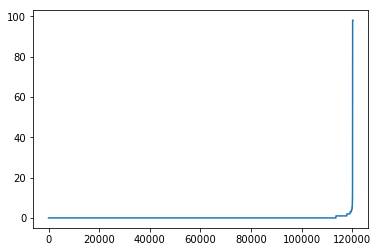

In [1196]:
atr = x[:, 6].argsort()
plt.plot(x[:, 6][atr])

In [1200]:
mc._find_threshold(x[:, 6], y)

(13850.753616551754, 1.0)

In [1]:
mc

NameError: name 'mc' is not defined

In [1199]:
(y[atr][1:] != y[atr][:-1]).sum()

13634

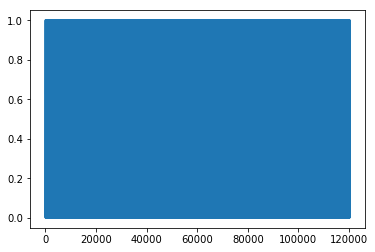

In [1197]:
plt.plot(y[atr])

In [1152]:
%lprun -f mc.fit -f mc._find_threshold -f mc._fit_node mc.fit(x, y)

In [893]:
b = y[x[:, 0].argsort()]
(a[:-1] != a[1:]).sum()

14126

In [894]:
a = x[:, 0][x[:, 0].argsort()]
(a[:-1] != a[1:]).sum()

103062

In [912]:
np.where(a[:-1] != a[1:])

(array([  7870,   7871,   7872, ..., 120265, 120266, 120267], dtype=int64),)

In [907]:
c = b2[np.where(a[:-1] != a[1:], 1, 0)]
np.where(c[:-1] != c[1:])[0].shape

(11164L,)

In [918]:
b2.shape

(120269L,)

In [956]:
a1.shape

(103063L,)

In [1003]:
c0 = b2[a1] # number of classes at each possible split
c = np.where(c0[1:] != c0[:-1])[0] # where they change

d = np.unique(np.sort(np.concatenate((c + 1, c)))) # point right before and after they change
a1[d] # result??????

In [1014]:
d

array([     8,      9,     10, ..., 103031, 103032, 103033], dtype=int64)

In [1031]:
b2[a1][d] # how to get original index?

array([  524,   525,   526, ..., 14124, 14125, 14126])

In [ ]:
a1[d] # result??????

In [988]:
d.shape

(16708L,)

In [1000]:
b2.shape, b2[-100:]

((120269L,),
 array([14114, 14114, 14114, 14114, 14114, 14114, 14114, 14114, 14114,
        14114, 14114, 14115, 14116, 14116, 14116, 14116, 14116, 14116,
        14116, 14116, 14116, 14116, 14116, 14117, 14118, 14118, 14118,
        14118, 14118, 14118, 14118, 14118, 14118, 14118, 14119, 14120,
        14120, 14120, 14120, 14121, 14122, 14122, 14122, 14122, 14122,
        14123, 14124, 14124, 14124, 14124, 14124, 14124, 14124, 14124,
        14124, 14124, 14124, 14124, 14124, 14124, 14124, 14124, 14124,
        14124, 14124, 14124, 14124, 14124, 14124, 14124, 14125, 14126,
        14126, 14126, 14126, 14126, 14126, 14126, 14126, 14126, 14126,
        14126, 14126, 14126, 14126, 14126, 14126, 14126, 14126, 14126,
        14126, 14126, 14126, 14126, 14126, 14126, 14126, 14126, 14126, 14126]))

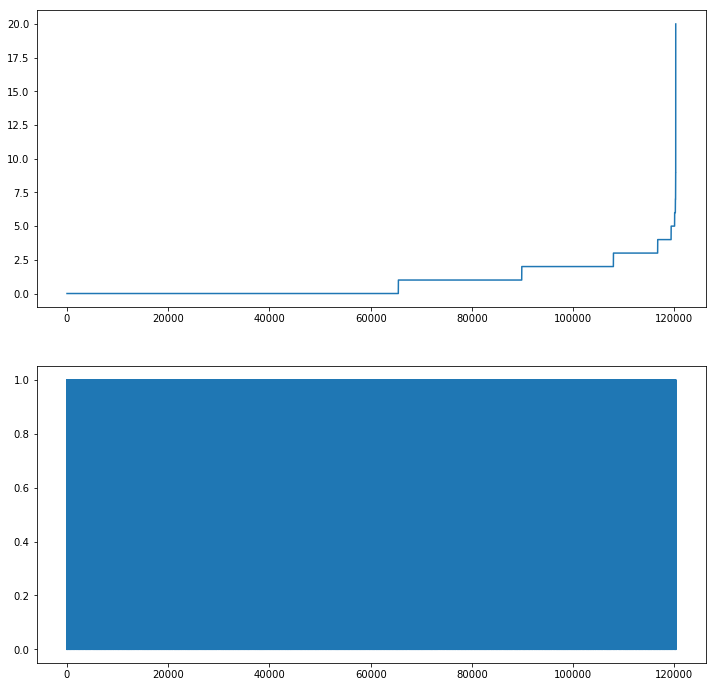

In [1141]:
feature = 9
asort = np.argsort(x[:, feature])
fig, axes = plt.subplots(2, figsize=(12, 12))
axes[0].plot(x[:, feature][asort])
axes[1].plot(y[asort])

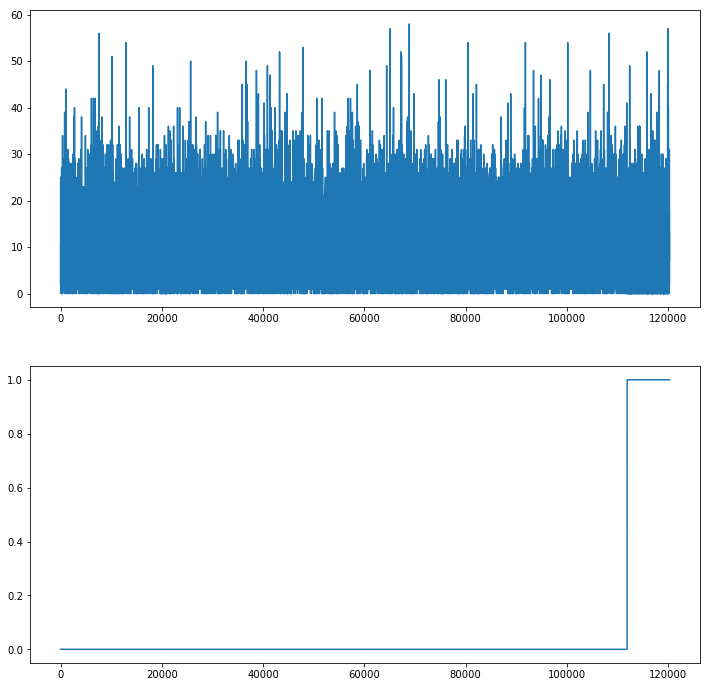

In [1136]:
feature = 5
asort = np.argsort(y)
fig, axes = plt.subplots(2, figsize=(12, 12))
axes[0].plot(x[:, feature][asort])
axes[1].plot(y[asort])

In [1001]:
a1.shape, a1[-100:]

((103062L,),
 array([120169, 120170, 120171, 120172, 120173, 120174, 120175, 120176,
        120177, 120178, 120179, 120180, 120181, 120182, 120183, 120184,
        120185, 120186, 120187, 120188, 120189, 120190, 120191, 120192,
        120193, 120194, 120195, 120196, 120197, 120198, 120199, 120200,
        120201, 120202, 120203, 120204, 120205, 120206, 120207, 120208,
        120209, 120210, 120211, 120212, 120213, 120214, 120215, 120216,
        120217, 120218, 120219, 120220, 120221, 120222, 120223, 120224,
        120225, 120226, 120227, 120228, 120229, 120230, 120231, 120232,
        120233, 120234, 120235, 120236, 120237, 120238, 120239, 120240,
        120241, 120242, 120243, 120244, 120245, 120246, 120247, 120248,
        120249, 120250, 120251, 120252, 120253, 120254, 120255, 120256,
        120257, 120258, 120259, 120260, 120261, 120262, 120263, 120264,
        120265, 120266, 120267, 120268], dtype=int64))

In [993]:
d

array([     8,      9,     10, ..., 103031, 103032, 103033], dtype=int64)

In [957]:
a1 = 1 + np.where(a[:-1] != a[1:])[0] # where we can split
a2 = np.append([0], np.where(a[:-1] != a[1:], 1, 0)).cumsum() 
b2 = np.append([0], np.where(b[:-1] != b[1:], 1, 0)).cumsum() # number of class changes up to this point

In [ ]:
np.where

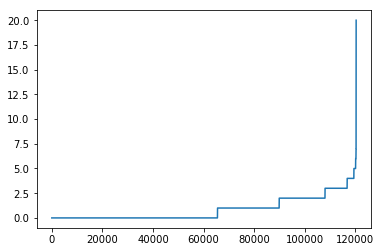

In [786]:
plt.plot(np.sort(x[:, 9]))

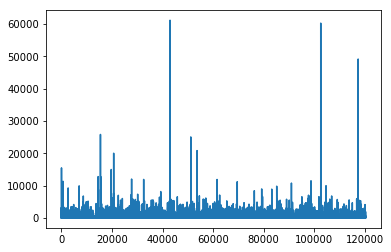

In [775]:
plt.plot(x[:, 3])

In [769]:
(y == 1).sum()

8357

In [733]:
sorted_x = np.array([0.1,0.1,0.5,2,3,3])
sorted_y = np.array([0,0,1,1,0,1])
min_samples_leaf = 1


splitted_sorted_x = sorted_x[min_samples_leaf - 1:len(sorted_y) - min_samples_leaf + 1]
r_border_ids = np.where(splitted_sorted_x[:-1] != splitted_sorted_x[1:])[0] + min_samples_leaf

#eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1]) # self.min_samples_split
one_hot_code = np.zeros((sorted_y.shape[0], sorted_y.max() + 1))
one_hot_code[np.arange(sorted_y.shape[0]), sorted_y] = 1

l_class_count = np.cumsum(one_hot_code, axis=0)[r_border_ids - 1]        
r_class_count = np.bincount(sorted_y, minlength=class_number) - l_class_count #sorted_y
l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
r_sizes = sorted_y.shape[0] - l_sizes

In [735]:
l_class_count, r_class_count, l_sizes, r_sizes

(array([[ 2.,  0.],
        [ 2.,  1.],
        [ 2.,  2.]]), array([[ 1.,  3.],
        [ 1.,  2.],
        [ 1.,  1.]]), array([[2],
        [3],
        [4]], dtype=int64), array([[4],
        [3],
        [2]], dtype=int64))

In [869]:
my_clf = MyDecisionTreeClassifier(min_samples_split=80, min_samples_leaf=40)
my_clf_old = MyDecisionTreeClassifier_old(min_samples_split=40)
clf = DecisionTreeClassifier(min_samples_split=2)

In [1179]:
my_clf = MyDecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1)
my_clf_old = MyDecisionTreeClassifier_old(min_samples_split=2)
clf = DecisionTreeClassifier(min_samples_split=2)

## Проверка скорости работы

In [1180]:
t1 = time()
my_clf_old.fit(x, y)
t2 = time()
print(t2 - t1)

(120269L,)
(2413L,) (117856L,)
(2413L,)
(854L,) (1559L,)
(117856L,)
0.677999973297


In [1068]:
t1 = time()
my_clf.fit(x, y)
t2 = time()
print(t2 - t1)

13.6579999924


In [1069]:
t1 = time()
clf.fit(x, y)
t2 = time()
print(t2 - t1)

1.44599986076


## Проверка качества работы

Scewed dataset?

In [745]:
gkf = KFold(n_splits=5, shuffle=True)

In [1181]:
#original>
for train, test in gkf.split(x, y):
    X_train, y_train = x[train], y[train]
    X_test, y_test = x[test], y[test]
    my_clf_old.fit(X_train, y_train)
    #print my_clf.predict(X_test).sum()
    print(accuracy_score(y_pred=my_clf_old.predict(X_test), y_true=y_test))

(96215L,)
(1947L,) (94268L,)
(1947L,)
(532L,) (1415L,)
(94268L,)
0.933150411574
(96215L,)
(1911L,) (94304L,)
(1911L,)
(413L,) (1498L,)
(94304L,)
0.931778498379
(96215L,)
(1925L,) (94290L,)
(1925L,)
(421L,) (1504L,)
(94290L,)
0.934023447244
(96215L,)
(1926L,) (94289L,)
(1926L,)
(486L,) (1440L,)
(94289L,)
(3414L,) (90875L,)
0.930032427039
(96216L,)
(1943L,) (94273L,)
(1943L,)
(682L,) (1261L,)
(94273L,)
(3423L,) (90850L,)
0.930985739825


In [695]:
#original >=
for train, test in gkf.split(x, y):
    X_train, y_train = x[train], y[train]
    X_test, y_test = x[test], y[test]
    my_clf.fit(X_train, y_train)
    #print my_clf.predict(X_test).sum()
    print(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))

0.931113328345
0.934522324769
0.928494221335
0.929325683878
0.927826050804


In [871]:
#new
for train, test in gkf.split(x, y):
    X_train, y_train = x[train], y[train]
    X_test, y_test = x[test], y[test]
    my_clf.fit(X_train, y_train)
    #print my_clf.predict(X_test).sum()
    print(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))

0.932069510269
0.929034671988
0.933607715972
0.933316704082
0.933313931734


In [566]:
(my_clf.predict(x) != y).sum()

7067

In [565]:
(clf.predict(x) != y).sum()

2585

In [559]:
(y != 0).sum()

8357

In [1072]:
print(accuracy_score(y_pred=my_clf.predict(x), y_true=y))
print(accuracy_score(y_pred=my_clf_old.predict(x), y_true=y))
print(accuracy_score(y_pred=clf.predict(x), y_true=y))

0.991435864604
0.935827187388
0.999983370611


In [884]:
for train, test in gkf.split(x, y):
    X_train, y_train = x[train], y[train]
    X_test, y_test = x[test], y[test]
    clf.fit(X_train, y_train)
    #print clf.predict(X_test).sum()
    print(accuracy_score(y_pred=clf.predict(X_test), y_true=y_test))

0.893697513927
0.89423796458
0.891702003825
0.892117735096
0.892030100195


In [885]:
for train, test in gkf.split(x, y):
    X_train, y_train = x[train], y[train]
    X_test, y_test = x[test], y[test]
    clf.fit(X_train, y_train)
    #print clf.predict(X_test).sum()
    print(accuracy_score(y_pred=clf.predict(X_test), y_true=y_test))
    my_clf.fit(X_train, y_train)
    #print clf.predict(X_test).sum()
    print(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))

0.891369418808
0.885341315374
0.890371663757
0.884592999085
0.893281782656
0.887461544857
0.89190986946
0.885507607882
0.890907579096
0.887706315221


In [866]:
clf = DecisionTreeClassifier(min_samples_split=80, min_samples_leaf=40)
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=80,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
class MyDecisionTreeClassifier_new:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, 
                 min_samples_split=2, 
                 min_samples_leaf=1,
                 max_depth=None,
                 sufficient_share=1.0,
                 criterion='gini',
                 max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print 'invalid criterion name'
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print 'invalid max_features name'
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return ((1. - ((l_c / l_s) ** 2).sum(axis=1)) * l_s.T + (1. - ((r_c / r_s) ** 2).sum(axis=1)) * r_s.T)[0]
    
    def __entropy(self, l_c, l_s, r_c, r_s): #check correct formulae
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (-((l_c / l_s) * np.log(l_c / l_s)).sum(axis=1)) * l_s.T - ((r_c / r_s) * np.log(r_c / r_s)).sum(axis=1) * r_s.T

    def __misclass(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        return (1 - np.max(l_c, axis=1) / l_s) * l_s.T + (1 - np.max(r_c, axis=1) / r_s) * r_s.T

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.sqrt(n_feature))]
        
    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[int(np.log2(n_feature))]

    def __get_feature_ids_N(self, n_feature):
        return range(n_feature)
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]
    
    def test(self, x, y, feature):
        _, thresh = self._find_threshold(x[:, feature], y)
        return self.__div_samples(x, y, feature, thresh), _, thresh
    
    def _find_threshold(self, x, y):
        sorted_x, sorted_y = self.__sort_samples(x, y)
        class_number = np.unique(y).shape[0]
        
        #sorted_x = sorted_x[self.min_samples_leaf - 1:len(sorted_y) - self.min_samples_leaf + 1]
        #splitted_sorted = sorted_y[self.min_samples_split: -self.min_samples_split] # min leaf
        a1 = np.where(sorted_x[:-1] != sorted_x[1:])[0] # where we can split
        b2 = np.append([0], np.where(sorted_y[:-1] != sorted_y[1:], 1, 0)).cumsum() # number of class changes up to this point
        c0 = b2[a1] # number of classes at each possible split
        c = np.where(c0[1:] != c0[:-1])[0] # where they change

        d = np.unique(np.sort(np.concatenate((c + 1, c)))) # point right before and after they change
        #a1[d] # result??????
        r_border_ids = a1[d] + 1
        #r_border_ids = a1 + 1
        #[self.min_samples_leaf - 1:len(sorted_y) - self.min_samples_leaf + 1] + self.min_samples_leaf
        
        if len(r_border_ids) == 0 or class_number == 1:
            return float('+inf'), None
        eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1])
        one_hot_code = np.zeros((sorted_y.shape[0], sorted_y.max() + 1))
        one_hot_code[np.arange(sorted_y.shape[0]), sorted_y] = 1
        
        l_class_count = np.cumsum(one_hot_code, axis=0)[r_border_ids - 1]        
        r_class_count = np.bincount(sorted_y, minlength=class_number) - l_class_count
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        idx = np.argmin(gs)
        
        left_el_id = l_sizes[idx][0]
        gs[idx], sorted_x[left_el_id]
        #print r_border_ids.shape, idx, gs[idx]
        return gs[idx], 1.0 * sorted_x[left_el_id - 1] * left_el_id / sorted_y.shape[0] + \
    1.0 * sorted_x[left_el_id] * (1.0 - 1.0 * left_el_id / sorted_y.shape[0])
#         eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1]) # self.min_samples_split
#         one_hot_code = np.zeros((sorted_y.shape[0], sorted_y.max() + 1))
#         one_hot_code[np.arange(sorted_y.shape[0]), sorted_y] = 1
#         #class_increments = one_hot_code * eq_el_count.reshape(-1, 1) # broadcasting
#         #class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_leaf - 1], minlength=class_number)
        
#         l_class_count = np.cumsum(one_hot_code, axis=0)[r_border_ids - 1]        
#         r_class_count = np.bincount(sorted_y, minlength=class_number) - l_class_count #sorted_y
#         l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
#         r_sizes = sorted_y.shape[0] - l_sizes
        
#         eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1])
#         one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
#         one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids - 1]] = 1
#         class_increments = one_hot_code * eq_el_count.reshape(-1, 1)
#         class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_leaf - 1],
#                                                                 minlength=class_number)
        
#         # Что делает этот блок кода?
#         # l_class_count -- в каждой строчке написано, сколько элементов каждого класса будет в левом узле, если разбить
#         # по соответствующему элементу
#         # r_class_count -- то, сколько в правом узле
#         # l_sizes -- размеры левого узла при разбиениях
#         # r_sizes -- размеры правого
#         l_class_count = np.cumsum(class_increments, axis=0)        
#         r_class_count = np.bincount(sorted_y) - l_class_count
#         l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
#         r_sizes = sorted_y.shape[0] - l_sizes
# #         #eq_el_count = r_border_ids - np.append([self.min_samples_leaf - 1], r_border_ids[:-1]) # self.min_samples_split
# #         one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
# #         one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids]] = 1
# #         #class_increments = one_hot_code * eq_el_count.reshape(-1, 1) # broadcasting
# #         #class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_leaf - 1], minlength=class_number)
        
# #         l_class_count = np.cumsum(one_hot_code, axis=0)[r_border_ids - 1]        
# #         r_class_count = np.bincount(sorted_y, minlength=class_number) - l_class_count #sorted_y
# #         l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
# #         r_sizes = sorted_y.shape[0] - l_sizes

        
#         gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
#         idx = np.argmin(gs)
        
#         left_el_id = l_sizes[idx][0]
#         #sorted_x[left_el_id + 1]
#         if sorted_x[left_el_id - 1] == sorted_x[left_el_id]:
#             raise Exception
#         #print r_border_ids.shape, left_el_id
#         return gs[idx], 1.0 * sorted_x[left_el_id - 1] * left_el_id / sorted_y.shape[0] + 1.0 * sorted_x[left_el_id] * (1.0 - 1.0 * left_el_id / sorted_y.shape[0])

    def _fit_node(self, x, y, node_id, depth, pred_f=-1):
        # self.LEAF_TYPE
        # self.NON_LEAF_TYPE
        leaf = [
            self.__class__.LEAF_TYPE, 
            np.argmax(np.bincount(y, minlength=self.num_class)), 
            np.bincount(y, minlength=self.num_class) * 1.0 / y.shape[0]
        ]
        if depth == self.max_depth or x.shape[0] < self.min_samples_split or np.unique(y).shape[0] == 1:
            self.tree[node_id] = leaf
            #print 'leaf1'
            if depth == self.max_depth:
                print 'max_depth'
            return
        # self.tree
        # self.max_depth
        # self.sufficient_share
        # self.min_samples_split
        feature_ids = self.get_feature_ids(x.shape[1])
        split_data = []
        for feature in feature_ids:
            error, threshold = self._find_threshold(x[:, feature], y)
            split_data.append([feature, error, threshold])
        best_split = min(split_data, key=lambda split: split[1])
        # self.get_feature_ids
        # self._find_threshold
        # self.__div_samples
        # self._fit_node
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_split[0], best_split[2])
        #print [i.shape[0] for i in [y_l, y_r]]
        if (best_split[1] == np.inf) or (not all([i.shape[0] for i in [y_l, y_r]])):
            #print 'leaf2', best_split[1]
            #print 'leaf2', best_split[1], [i.shape[0] for i in [y_l, y_r]]
            self.tree[node_id] = leaf
            return
        #print 'node'
        #print y_l.shape, y_r.shape, best_split
        self.tree[node_id] = (self.__class__.NON_LEAF_TYPE, best_split[0], best_split[2])
        self._fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        self._fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
    
    def fit(self, x, y):
        self.tree = {}
        self.num_class = np.unique(y).size
        self._fit_node(x, y, 0, 0) 

    def __predict_class(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_class(x, 2 * node_id + 1)
            else:
                return self.__predict_class(x, 2 * node_id + 2)
        else:
            return node[1]

    def __predict_probs(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_probs(x, 2 * node_id + 1)
            else:
                return self.__predict_probs(x, 2 * node_id + 2)
        else:
            return node[2]
        
    def predict(self, X):
        return np.array([self.__predict_class(x, 0) for x in X])
    
    def predict_probs(self, X):
        return np.array([self.__predict_probs(x, 0) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)